In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import warnings


: 

In [3]:
from catboost import CatBoostRegressor

In [4]:
from xgboost import XGBRegressor

In [5]:
df=pd.read_csv("T1.csv")

In [6]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
df.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


In [8]:
df.count()

Date/Time                        50530
LV ActivePower (kW)              50530
Wind Speed (m/s)                 50530
Theoretical_Power_Curve (KWh)    50530
Wind Direction (°)               50530
dtype: int64

In [9]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [10]:
df.isnull().values.any()

False

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [12]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [13]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

In [14]:
df.corr()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,1.000000,0.030971,-0.012209,0.006900,-0.180336
LV ActivePower (kW),0.030971,1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),-0.012209,0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.006900,0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.180336,-0.062702,-0.077188,-0.099076,1.000000


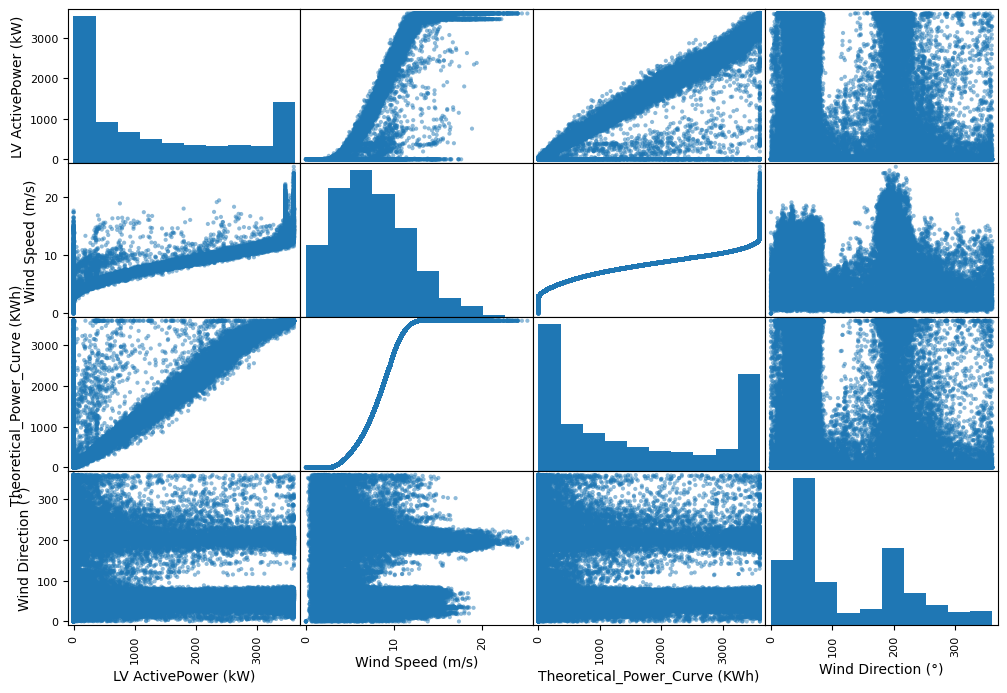

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df ,figsize =(12,8))
plt.show()

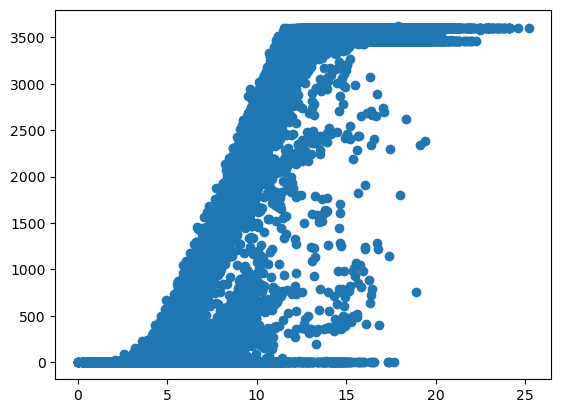

In [16]:
plt.scatter(df['Wind Speed (m/s)'],df['LV ActivePower (kW)'])

In [17]:
dataC = df.copy()

In [18]:
dataC['Month'] = dataC['Date/Time'].dt.month
dataC['week'] = dataC['Date/Time'].dt.isocalendar().week
dataC['day'] = dataC['Date/Time'].dt.day
dataC.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1


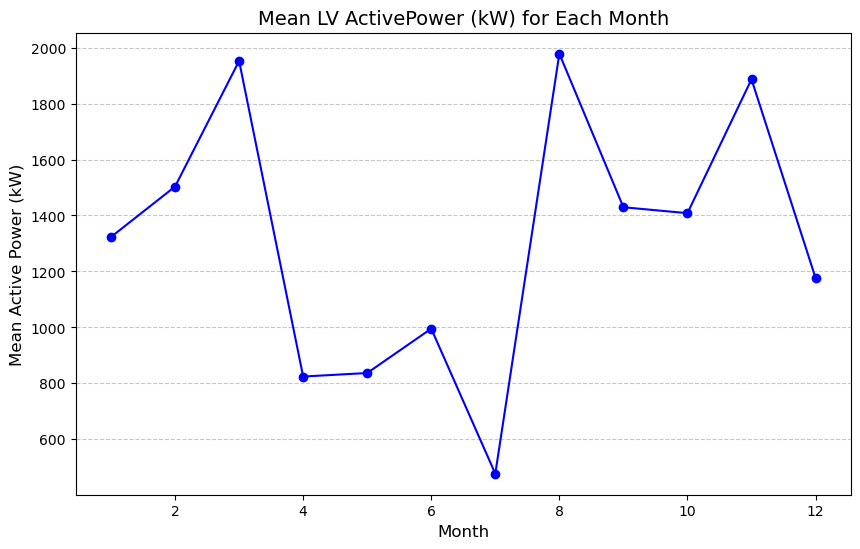

In [19]:
monthly_mean_p = dataC.groupby("Month")["LV ActivePower (kW)"].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_p.index, monthly_mean_p.values, marker="o", linestyle="-", color="blue", label="Mean Active Power")
plt.title("Mean LV ActivePower (kW) for Each Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Mean Active Power (kW)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

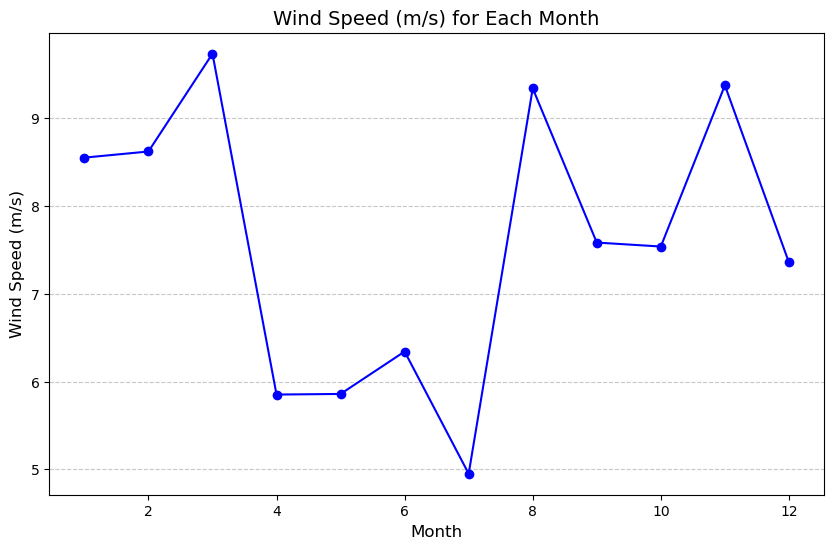

In [20]:
monthly_mean_w = dataC.groupby("Month")["Wind Speed (m/s)"].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_w.index, monthly_mean_w.values, marker="o", linestyle="-", color="blue", label="Mean Active Power")
plt.title("Wind Speed (m/s) for Each Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [21]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Winter', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}

dataC['Seasons'] = dataC['Month'].map(seasons_dict)
dataC

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Seasons
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,Winter
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,Winter
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,Winter
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,Winter
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1,Winter
...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,12,1,31,Winter
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,12,1,31,Winter
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,12,1,31,Winter
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,12,1,31,Winter


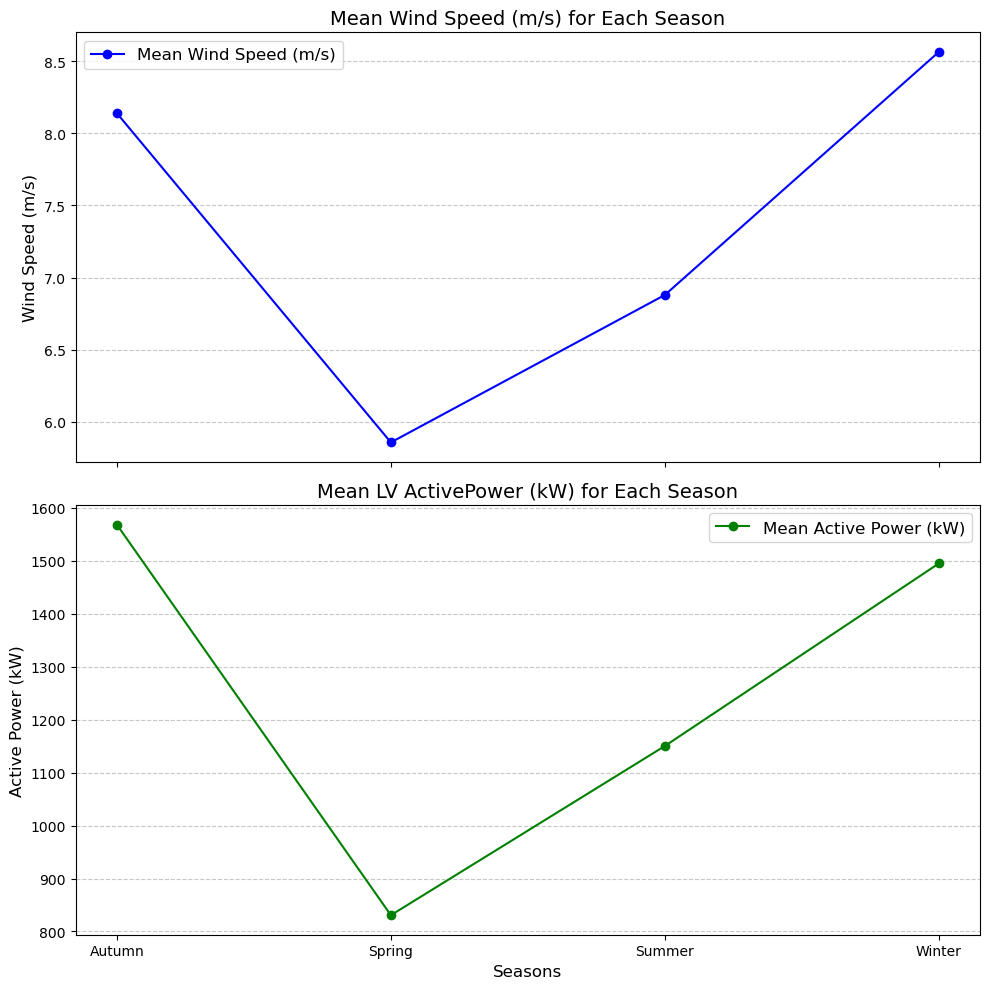

In [22]:
season_mean_w = dataC.groupby("Seasons")["Wind Speed (m/s)"].mean()
season_mean_p = dataC.groupby("Seasons")["LV ActivePower (kW)"].mean()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)


axes[0].plot(
    season_mean_w.index,
    season_mean_w.values,
    marker="o",
    linestyle="-",
    color="blue",
    label="Mean Wind Speed (m/s)"
)
axes[0].set_title("Mean Wind Speed (m/s) for Each Season", fontsize=14)
axes[0].set_ylabel("Wind Speed (m/s)", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].legend(fontsize=12)


axes[1].plot(
    season_mean_p.index,
    season_mean_p.values,
    marker="o",
    linestyle="-",
    color="green",
    label="Mean Active Power (kW)"
)
axes[1].set_title("Mean LV ActivePower (kW) for Each Season", fontsize=14)
axes[1].set_xlabel("Seasons", fontsize=12)
axes[1].set_ylabel("Active Power (kW)", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].legend(fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
dataC['Hour']=dataC['Date/Time'].dt.hour
dataC

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Seasons,Hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,Winter,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,Winter,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,Winter,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,Winter,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1,Winter,0
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,12,1,31,Winter,23
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,12,1,31,Winter,23
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,12,1,31,Winter,23
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,12,1,31,Winter,23


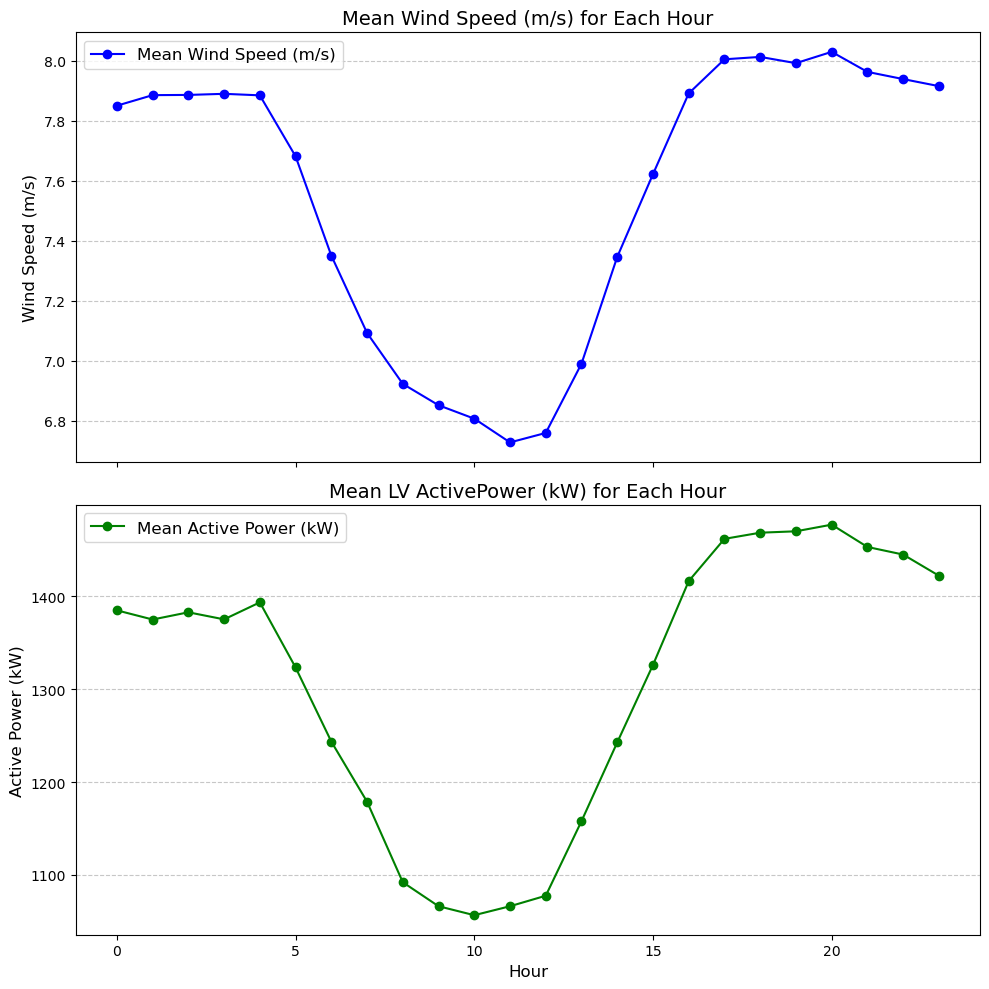

In [24]:
Hour_mean_w = dataC.groupby("Hour")["Wind Speed (m/s)"].mean()
Hour_mean_p = dataC.groupby("Hour")["LV ActivePower (kW)"].mean()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)


axes[0].plot(
    Hour_mean_w.index,
    Hour_mean_w.values,
    marker="o",
    linestyle="-",
    color="blue",
    label="Mean Wind Speed (m/s)"
)
axes[0].set_title("Mean Wind Speed (m/s) for Each Hour", fontsize=14)
axes[0].set_ylabel("Wind Speed (m/s)", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].legend(fontsize=12)


axes[1].plot(
    Hour_mean_p.index,
    Hour_mean_p.values,
    marker="o",
    linestyle="-",
    color="green",
    label="Mean Active Power (kW)"
)
axes[1].set_title("Mean LV ActivePower (kW) for Each Hour", fontsize=14)
axes[1].set_xlabel("Hour", fontsize=12)
axes[1].set_ylabel("Active Power (kW)", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()